In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Richtigkeit und Präzision sind beim Bogenschiessen gleichermassen wichtig. Es gibt verschiedene Arten, wie ein Bogenschütze daneben liegen kann:

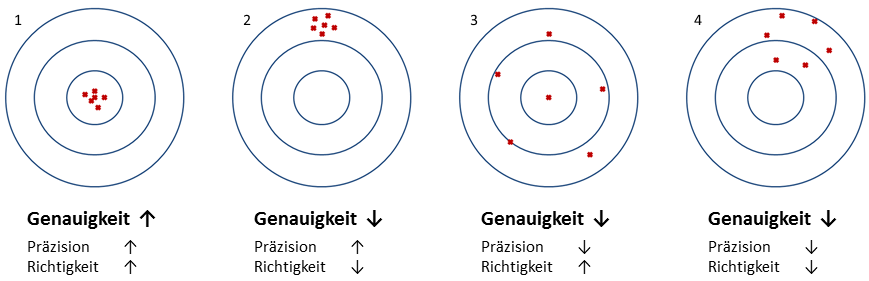

Unter Bias kann man sich intuitiv eine niedrige Richtigkeit, unter Varianz eine niedrige Präzision vorstellen. In diesem Notebook werden diese Begriffe rigoros gemacht und an einem Beispiel vorgestellt.

In einem Klassifikationsproblem sind folgende Elemente gegeben: ein Trainings-Datensatz $(X,y),$ wobei $X$ die features sind und $y$ das Klassenlabel (oder bei der Regression der Regressionswert); eine Hypothesenmenge ${\cal H}$, die Menge aller zugänglicher Klassifikatoren $\hat{y}=\hat{f}(X)$; einer Kostenfunktion, welche besagt, wie gut eine Hypothese auf dem Datensatz abschneidet. Ebenfalls vorhanden, aber unbekannt sind: eine statistische Verteilung, aus welcher der Trainingsdatensatz gezogen wird; eine Zielfunktion $y=f(X)$, welche idealerweise die "richtigen" $y$-Werte zu jedem beliebigen Feature-Vektor $X$ zurückgibt. 

Das Ziel ist nun gerade **nicht**, die Kostenfunktion auf dem Trainingsdatensatz zu minimieren. Vielmehr soll die Kostenfunktion auf noch ungesehenen Daten, welche aus der selben Verteilung wie der Trainingsdatensatz gezogen wurden, minimiert werden.

Der Fehler eines Klassifikators $\hat{f}$ ist $$e^2=E_{\cal D}\left[E_X[(\hat{y}-y)^2]\right].$$ Hier werden zwei verschiedene Erwartungswerte genommen: 

$E_X$ bezeichnet den Mittelwert über alle Elemente $x$. $$E_X\left[(\hat{f}(X)-f(X))^2\right]\approx \frac{1}{N}\sum_{i=1}^N \left(\hat{f}(x_i)-y_i\right)^2, x_i\in {\cal D}.$$ 
Die Elemente $x_i$ sind eine Stichprobe aus X, d.h. sie sind konkret im Trainingsdatensatz vorhanden. Rechts wird also der sog. Trainingsfehler, der Fehler auf dem Trainingsdatensatz berechnet. Links steht der Verallgemeinerungsfehler, die idealisierte Version des Erwartungswerts über alle möglichen Werte (Realisierungen) von $X$. 

Ist der Trainingsfehler ein guter Schätzer für den Verallgemeinerungsfehler? Dies hängt davon ab, wie gut wir den Kompromiss zwischen zu viel Bias und zu viel Varianz

$E_{\cal D}$ bezeichnet hingegen den Erwartungswert über alle möglichen Trainingssets (von denen wir typischerweise nur ein einziges Beispiel kennen).
Z.B. bezeichnen wir nun mit $\bar{g}(x)=E_{{\cal D}}[\hat{f}_{\cal D}(x)]$ den Mittelwert aller Funktionswerte $\hat{f}_{\cal D}(x)$ bei $x$, wobei $\hat{f}_{\cal D}$ jener Klassifikator ist, welcher durch ein Training auf dem Trainingsdatensatz ${\cal D}$ entsteht. Der Wert $x$ ist hier fixiert. Es variiert nur der Trainingsdatensatz ${\cal D}$, und für jedes ${\cal D}$ entsteht ein neuer Schätzer $\hat{f}$, welcher bei $x$ ausgewertet wird: $\hat{f}(x)$. $\bar{g}$ ist dann der Mittelwert aller dieser Werte $\hat{f}_{\cal D}(x)$. Da $\bar{g}$ über alle Trainingsdatensätze gemittelt ist, kann man intuitiv sich vorstellen, dass dadurch ein wohl besserer Klassifikator entsteht, als jedes einzelne  $\hat{f}_{\cal D}$. Für das vorhandene Hypothesenset ist $\bar{g}$ so etwas wie ein "Super"-Klassifikator- er hat alle Trainingsdaten gesehen und daraus gelernt.

Der Fehler $e^2$ kann nun folgendermassen zerlegt werden:  
$$ e^2=\mathrm{variance}+\mathrm{bias}$$

    Beweis, nur für die besonders interessierten: 
$$ e^2=E_{X}\left[E_{\cal D}\bigl[\left(\hat{f}_{\cal D}(X)-\bar{g}(X)\right)^2\bigr]\right]+E_X\bigl[\left(\bar{g}(X)-f(X)\right)^2\bigr]=E_{X}\mathrm{variance}(X)+E_X\mathrm{bias}(X)=\mathrm{variance}+\mathrm{bias}$$

Der Erwartungswert über alle Datenpunkte $x$ ist nicht weiter erstaunlich. Interessanter sind die Ausdrücke  
\begin{align}
\mathrm{bias}(X) &= \left(\bar{g}(X)-f(X)\right)^2\\  
\mathrm{variance}(X)&=E_{\cal D}\bigl[\left(\hat{f}_{\cal D}(X)-\bar{g}(X)\right)^2\bigr]
\end{align}

Versuchen Sie, diese mit dem Bogenschiessbeispiel zu vergleichen! $\bar{g}(X)$ ist der Mittelpunkt aller Einschussstellen, $f(X)$ das Zentrum der Zielscheibe. $\hat{f}_{\cal D}(X)$ ist dann eine einzelne Einschussstelle.

Der Bias misst die Abweichung eines gegebenen Klassifikators (aus dem Hypothesenset) vom mittleren "Super"-Klassifikator, also wie sehr ein einzelner von einem mittleren Klassifikator abweichen kann. Ein grosser Bias kann bedeuten, dass das ganze Hypothesenset unflexibel ist- nämlich selbst im besten Fall die Struktur der Zielfunktion nicht lernen kann.  
Die Varianz hingegen sagt aus wie sehr die im Hypothesenset gegebenen Klassifikatoren untereinander und mit den gesehenen Trainingsdaten variieren. Je grösser die Varianz, umso flexibler ist das Hypothesenset, sich an die Trainingsdaten anzupassen und dabei möglicherweise die Zielfunktion aus den Augen zu verlieren.  

Wie wählen wir also ein Hypothesenset?
Wir haben die Qual der Wahl: Wählen wir ein hochpotentes Hypothesenset, welches den Trainingsdatensatz sehr gut approximiert (und dabei jede erdenkliche im Trainingsdatensatz vorhandene Struktur oder Fluktuation aufsaugt) und möglicherweise die Struktur der Zielfunktion aus den Augen verliert? Oder doch lieber ein rigides, kaum anpassungsfähiges Hypothesenset, welches höchstens die Grundstruktur einer komplizierteren Zielfunktion erfassen kann, dafür diese aber auf neue Daten gut verallgemeinert? Und dabei sicher keine Kapazität hat, durch etwas Rauschen die Zielfunktion aus den Augen zu verlieren?

In [2]:
#Unsere Targetfunktion:

def f(X,noise=0.0):
    try:
        eps=noise*np.random.randn(*X.shape)
    except AttributeError as err:
        #X ist kein Array, sondern ein einzelner Wert:
        eps=noise*np.random.randn(1)[0]
    return -np.sin(2*np.pi*X)+eps

Zeichnen Sie diese Funktion mit *sinnvollen* visuellen Elementen.

# Bestmöglicher konstanter und linearer Fit

In [3]:
X = np.linspace(0,1,100)
X = X.reshape((X.size,1))
#Ein Datensatz mit Rauschen:
noise=0.35
y = f(X,noise=noise)
#und einer ohne Rauschen:
yideal=f(X,noise=0.0)

Es gilt  
noise = np.sqrt(np.var(y-yideal))=$E_y\left[\left(\hat{y}-y\right)^2\right]=\sqrt{\frac{\sum_{i}\left(\hat{y}-y\right)^2}{N-1}}$

In [4]:
np.sqrt(np.var(y-yideal,ddof=1))

0.36411581300009244

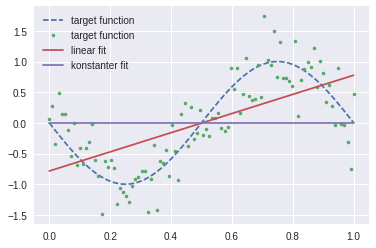

In [5]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X,y)
yhat=clf.predict(X)
plt.plot(X,yideal,ls='--',label='target function')
plt.plot(X,y,lw=0,marker='.',label='target function')
plt.plot(X,yhat,label='linear fit')
plt.plot([0,1],[0,0],label='konstanter fit')
plt.legend();

Der optimale Fehler ist bei grösserem, "flexiblerem" Hypothesenset kleiner:

Berechnen Sie den mittleren Fehler des linearen fits mit scikit-learn!

In [39]:
from sklearn.metrics import mean_squared_error


Berechnen Sie nun den mittleren Fehler von konstanten Hypothesen $f(x)=c$. Wie hängt er von $c$ ab? Plotten Sie ihn als Funktion von $c$.

## Unterschiedliche Hypothesensets

Wir betrachten nun zwei unterschiedliche Hypothesensets: konstante Funktionen, und lineare Funktionen. Als Trainingsdaten sind nur zwei (!) Datenpunkte gegeben. Welches Set ist passender, verallgemeinert besser mit Hinblick auf die Zielfunktion?

In [9]:
NrTrainingRuns=500

Xtrain = np.random.rand(NrTrainingRuns,2)
ytrain=f(Xtrain,noise=noise) #2 y-Werte pro Datenzeile

#Teste jeden Klassifikator an NrTestSamples Punkten
NrTestSamples=1000
Xtest = np.random.rand(NrTestSamples,1)
ytest=f(Xtest,noise=noise)

### konstante Hypothese

In [10]:
def trainOnConstant(X,y):
    """
    Der bestmögliche konstante Klassifikator auf zwei Datenpunkten
    (X hat zwei Spalten) ist der Mittelwert der zwei Trainingspunkte.
    """
    return np.mean(y,axis=1)

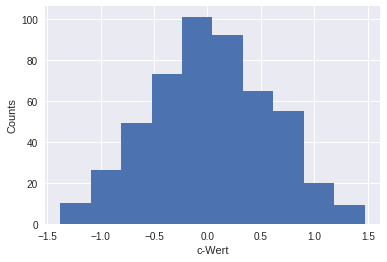

In [40]:
#Wie schwanken unsere konstanten Klassifikatoren, 
#wenn das Trainingsset sich ändert? 
#Der Klassifikator gebe immer den Wert c aus:
b1=trainOnConstant(Xtrain,ytrain)
plt.hist(b1);
plt.xlabel('c-Wert'),plt.ylabel('Counts');

In [46]:
#Wie sehr streuen die b1-Werte? (Dies benötigen Sie später)
np.std(b1,ddof=1)

0.55679724666232122

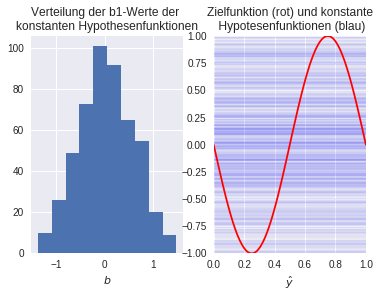

In [45]:
b1=trainOnConstant(Xtrain,ytrain)
plt.subplot(1,2,1)
plt.hist(b1);
plt.title('Verteilung der b1-Werte der \nkonstanten Hypothesenfunktionen')
plt.xlabel('$b$')
#jeder Wert b in b1 bedeutet eine Hypothese f(x)=b
plt.subplot(1,2,2)

xx=np.linspace(0,1,100)
plt.xlim(0,1);
for b in b1:
    pass
    plt.plot([0,1],[b,b],c='b',alpha=0.6,lw=0.1)
plt.xlabel('$x$')    
plt.xlabel(r'$\hat{y}$')    
plt.plot(xx,f(xx),c='r')
plt.title('Zielfunktion (rot) und konstante\n Hypotesenfunktionen (blau)')
plt.ylim(-1,1);

Die meisten konstanten Klassifikatoren liegen um Null herum. Deren mittlere Abweichung von der Targetfunktion (dem Sinus) ist sehr klein. Dies bedeutet ein kleiner Bias.

### lineare Hypothese

Nun schauen wir uns die linearen Funktionen an. Sie sollen immer noch den Sinus approximieren, und immernoch enthält jeder Trainingsdatensatz nur zwei Punkte. Lineare Funktionen können zwei Punkte perfekt fitten, d.h. wir wissen jetzt schon, dass der Trainingsfehler in diesem Fall immer gleich Null ist! Da die Minimierung des Trainingsfehlers ja das Ziel beim Training ist, sieht das erst mal toll aus...

In [13]:
def trainOnLine(X,y):
    """
    X.shape=N,2
    y.shape=N,2
    X und y definieren zwei Punkte
    Diese Funktion gibt den besten linearen Klassifikator zurück welcher die 
    zwei gegebenen Punkte X[0],y[0] und X[1],y[1] approximieren soll: 
    Nämlich gerade jene Gerade, welche durch diese zwei Punkte geht.
    Zurückgegeben werden die Werte a und b, 
    so dass für jede Zeile von X und y gilt
    a*X[:,0]+b=y[:,0] und
    a*X[:,1]+b=y[:,1]
    >>>Xt=np.array([[0,1]])
    >>>yt=np.array([[0,1]])
    >>>trainOnLine(Xt,yt)
    (array([ 1.]), array([ 0.]))
    d.h. die Linie durch (x,y)=(0,0) und (x,y)=(1,1) ist 1.*x+0.=y
    """
    a=(X[:,0]-X[:,1])/(y[:,0]-y[:,1])
    b=y[:,1]-X[:,1]*(X[:,0]-X[:,1])/(y[:,0]-y[:,1])
    return a,b

Xt=np.array([[0,1]])
yt=np.array([[0,1]])
trainOnLine(Xt,yt)

(array([ 1.]), array([ 0.]))

In [14]:
Xtrain.shape,ytrain.shape

((500, 2), (500, 2))

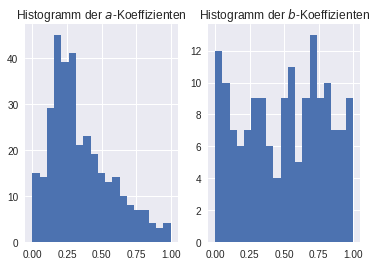

In [23]:
a2,b2=trainOnLine(Xtrain,ytrain)
#jedes Tupel a,b in a2,b2 bedeutet eine Hypothese f(x)=a*x+b
#mache daraus eine N x 2 - Matrix
AB=np.vstack((a2,b2)).T

#nicht sonderlich wichtig, aber es ist immer gut, einen Überblick 
#darüber zu suchen, was der Klassifikator macht:
plt.subplot(1,2,1)
plt.hist(AB[:,0],bins=np.linspace(0,1,20));
plt.title('Histogramm der $a$-Koeffizienten');
plt.subplot(1,2,2)
plt.hist(AB[:,1],bins=np.linspace(0,1,20))
plt.title('Histogramm der $b$-Koeffizienten');

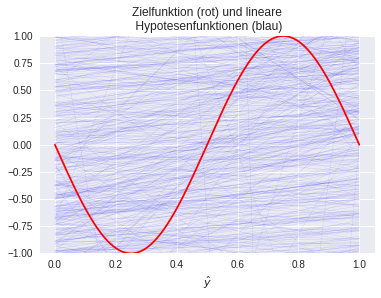

In [24]:
#Hier zeichnen wir unsere Klasse der trainierten linearen Schätzer 
#(blaue Linien). Bei der Berechnung von Bias und Varianz wird darüber 
#gemittelt, nur eben unterschiedlich.
plt.subplot(1,1,1)
xx=np.linspace(0,1,1000)
for a,b in AB:
    yy=a*xx+b
    plt.plot(xx,yy,c='b',alpha=0.5,lw=0.1)
plt.xlabel('$x$')    
plt.xlabel(r'$\hat{y}$')    
plt.plot(xx,f(xx),c='r')
plt.title('Zielfunktion (rot) und lineare\n Hypotesenfunktionen (blau)')
plt.ylim(-1,1);

## Mean squared error der Hypothesensets

In [25]:
# Nun mitteln wir den Fehler über alle konstanten Klassifikatoren b1, 
# welche aus zufälligen zwei Trainingspunkten (Xtrain) gebildet wurden.
errList=[]
#oder Xtest=np.linspace(0,1,1000)
for x in Xtest:
    errList.append((b1 - f(x))**2)
err_constant=np.mean(errList)
err_constant

0.82216816076800203

In [26]:
# Nun mitteln wir den Fehler über alle linearen Klassifikatoren b1, 
# welche aus zufälligen zwei Trainingspunkten (Xtrain) gebildet wurden.
errList=[]
#oder Xtest=np.linspace(0,1,1000)
for x in Xtest:
    errList.append((a2*x+b2 - f(x))**2)
err_linear=np.mean(errList)
err_linear

3.9337074946554953

Welches Hypothesenset ist wohl geeigneter, um die Zielfunktion zu schätzen?

## Bias der Hypothesensets

In [27]:
#Zur Übung berechnen wir zuerst den Bias des konstanten Klassifikators 
# b=0.3:
b=0.3
print(mean_squared_error(f(Xtest), np.ones(Xtest.shape)*b))
#Als Check erwarten wir das Resultat 0.5 für b=0:
b=0.0
print(mean_squared_error(f(Xtest), np.ones(Xtest.shape)*b))

0.596215914063
0.51229372575


Offenbar ist der Fehler $e^2=0.5+b^2$.

Er lässt sich exakt rechnen als
$$\int_0^1(\hat{f}(x)-y)^2dx=\int_0^1\left(\sin(2\pi x)-b\right)^2dx=\int_0^1\left(\sin^2(2\pi x)\right)^2-2\int_0^1 b\sin(2\pi x)dx+b^2\int_0^1 dx=\frac{1}{2}-2\cdot 0+b^2=\frac{1}{2}+b^2$$

Der mittlere ("Super-")Klassifikator ist

In [28]:
np.mean(b1)

0.034086272212799952

In [29]:
# Nun berechnen wir den mittleren Bias über alle konstanten Klassifikatoren b1, 
# welche aus zufälligen zwei Trainingspunkten (Xtrain) gebildet wurden.
bias_constant_list=[]
#oder Xtest=np.linspace(0,1,1000)
for x in Xtest:
    bias_constant_list.append((np.mean(b1) - f(x))**2)
bias_constant=np.mean(bias_constant_list)
bias_constant

0.5127650332250413

In [30]:
# Und noch den mittleren Bias über alle linearen Klassifikatoren a1*x+b1, 
# welche aus zufälligen zwei Trainingspunkten (Xtrain) gebildet wurden.
bias_linear_list=[]
for x in np.linspace(0,1,1000):
    bias_linear_list.append((np.mean(a2*x+b2) - f(x))**2)
bias_linear=np.mean(bias_linear_list)
bias_linear

0.47834222744018345

Der Bias der linearen fits ist (oft etwas) kleiner als der konstanten fits. 
Die linearen Funktionen können sich besser an das Problem (Sinus fitten) anpassen als die konstanten Funktionen.

In [31]:
# Nun bestimmen wir die Varianz über alle konstanten Klassifikatoren b1, 
# welche aus zufälligen zwei Trainingspunkten (Xtrain) gebildet wurden.
varianzList=[]
#oder Xtest=np.linspace(0,1,1000)
for x in Xtest:
    yhat=b1
    #varianzList.append(np.var(yhat))
    varianzList.append(np.mean((yhat-np.mean(yhat))**2))
varianz_constant=np.mean(varianzList)
varianz_constant

0.3094031275429604

In [34]:
np.var?

In [35]:
varianzList=[]
for x in Xtest:
    yhat=a2*x+b2
    #varianzList.append(np.var(yhat))
    varianzList.append(np.mean((yhat-np.mean(yhat))**2))
varianz_linear=np.mean(varianzList)
varianz_linear

3.4424426874773171

In [36]:
err_constant-(bias_constant+varianz_constant)

3.3306690738754696e-16

In [37]:
err_linear-(bias_linear+varianz_linear)

0.012922579737994599

Diese Zeilen überprüfen die Bias-Varianz-Zerlegung (bis auf wenige Promille. Exakterweise muss noch die Varianz des Rauschens dazugezählt werden)

Fassen Sie bitte zusammen: Was lehrt uns dieses Beispiel?

# Aufgabe

Berechnen Sie Bias und Varianz des konstanten und linearen Klassifikators,
wenn drei Datenpunkte zur Verfügung stehen. Welches Resultat erwarten Sie?